**K Vecinos Cercanos**

In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('bmh')

In [23]:
#Datos
df = pd.read_csv('Social_Network_Ads.csv')
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


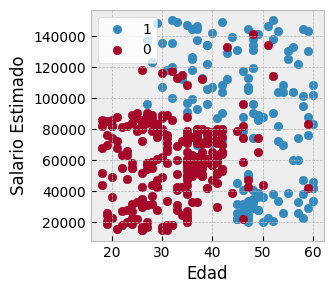

In [24]:
#Pre-Visualización
fig, ax = plt.subplots(1,1, figsize=(3,3))

ax.scatter(x[y==1,0], x[y==1,1], label='1')
ax.scatter(x[y==0,0], x[y==0,1], label='0')
ax.set_xlabel('Edad')
ax.set_ylabel('Salario Estimado')
ax.legend(facecolor='w')

fig.show()

In [25]:
#Entrenamiento-Prueba
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [26]:
#Escalado de Características
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
#Modelo
modelo = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
modelo.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
#Pred. vs Test
y_pred = modelo.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [29]:
#Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(f'Confusion Matrix:\n {cm}')
print(f'Accuracy: {ac:.2f}')
print(f'Puntaje: {modelo.score(x_test,y_test)}')

Confusion Matrix:
 [[55  3]
 [ 1 21]]
Accuracy: 0.95
Puntaje: 0.95


In [30]:
#Visualizar Entrenamiento
x1 = np.linspace(min(x[:,0])-10, max(x[:,0])+10, 100)
x2 = np.linspace(min(x[:,1])-1000, max(x[:,1])+1000, 100)
X1, X2 = np.meshgrid(x1,x2)

y_pred = modelo.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)

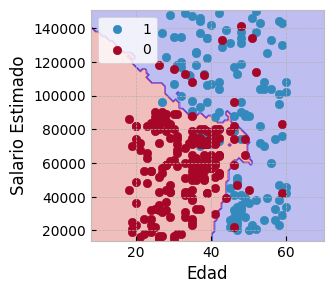

In [34]:
fig, ax = plt.subplots(1,1, figsize=(3,3))

x_set, y_set = sc.inverse_transform(x_train), y_train

ax.contourf(X1,X2,y_pred, alpha=0.2, cmap=ListedColormap(('red','blue')))
ax.scatter(x_set[y_set==1,0], x_set[y_set==1,1], label='1')
ax.scatter(x_set[y_set==0,0], x_set[y_set==0,1], label='0')
ax.set_xlabel('Edad')
ax.set_ylabel('Salario Estimado')
ax.legend(facecolor='w')

fig.show()

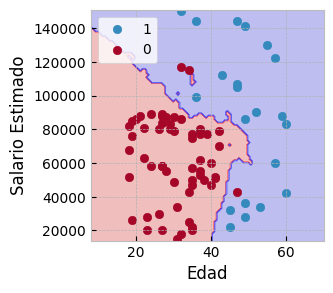

In [35]:
#Visualizar Test
fig, ax = plt.subplots(1,1, figsize=(3,3))

x_set, y_set = sc.inverse_transform(x_test), y_test

ax.contourf(X1,X2,y_pred, alpha=0.2, cmap=ListedColormap(('red','blue')))
ax.scatter(x_set[y_set==1,0], x_set[y_set==1,1], label='1')
ax.scatter(x_set[y_set==0,0], x_set[y_set==0,1], label='0')
ax.set_xlabel('Edad')
ax.set_ylabel('Salario Estimado')
ax.legend(facecolor='w')

fig.show()